# Investigating MASH logBF computation under EE model

This is a continuation of a [previous investigation](https://gaow.github.io/mvarbvs/analysis/20191204_Diagnosis.html).

## Load package and previous results

Previous result can be [downloaded here](https://github.com/gaow/mmbr/files/3935317/issue_9_EE_sumstats.tar.gz). `good_lbf` in this dataset saves `lbf` from `mmbr:::BayesianMultivariateRegression`.

In [1]:
devtools::load_all('/home/gaow/GIT/software/mashr')

Loading mashr
Loading required package: ashr


In [2]:
setwd('/home/gaow/tmp/07-Dec-2019')
dat = readRDS('issue_9_EE_sumstats.rds')

## Set data

In [3]:
mash_data = mash_set_data(dat$bhat, dat$sbhat, V=dat$V, alpha=0)

In [4]:
names(mash_data)

[1] "Bhat"       "Shat"       "Shat_alpha" "V"          "commonV"   
[6] "alpha"

## Compare loglik

In [5]:
r1 = calc_relative_lik_matrix(mash_data,dat$xUlist, algorithm.version = 'Rcpp')

In [6]:
r2= calc_relative_lik_matrix(mash_data,dat$xUlist, algorithm.version = 'R')

In [7]:
names(r1)

[1] "loglik_matrix" "lfactors"

In [8]:
expect_equal(r1$lfactors, r2$lfactors)

In [9]:
expect_equal(r1$loglik_matrix, r2$loglik_matrix)

Loglik computations are okay.

## Compare posterior

In [10]:
posterior_weights <- compute_posterior_weights(dat$pi_s,exp(r1$loglik_matrix))

In [11]:
p1 <- compute_posterior_matrices(mash_data, dat$xUlist, posterior_weights, algorithm.version="Rcpp")

In [12]:
p2 <- compute_posterior_matrices(mash_data, dat$xUlist, posterior_weights, algorithm.version="R")

In [13]:
names(p1)

[1] "PosteriorMean" "PosteriorSD"   "lfdr"          "NegativeProb" 
[5] "lfsr"

In [14]:
expect_equal(p1$PosteriorMean, p2$PosteriorMean)

In [15]:
expect_equal(p1$PosteriorSD, p2$PosteriorSD)

In [16]:
expect_equal(p1$lfdr, p2$lfdr)

In [17]:
expect_equal(p1$NegativeProb, p2$NegativeProb)

In [18]:
expect_equal(p1$lfsr, p2$lfsr)

Posterior calculations also are consistent between R and Rcpp versions.

## LBF calculations

In [19]:
null_loglik = compute_null_loglik_from_matrix(r1,mash_data$Shat_alpha)
alt_loglik = compute_alt_loglik_from_matrix_and_pi(dat$pi_s,r1,mash_data$Shat_alpha)

In [20]:
lbf = alt_loglik-null_loglik

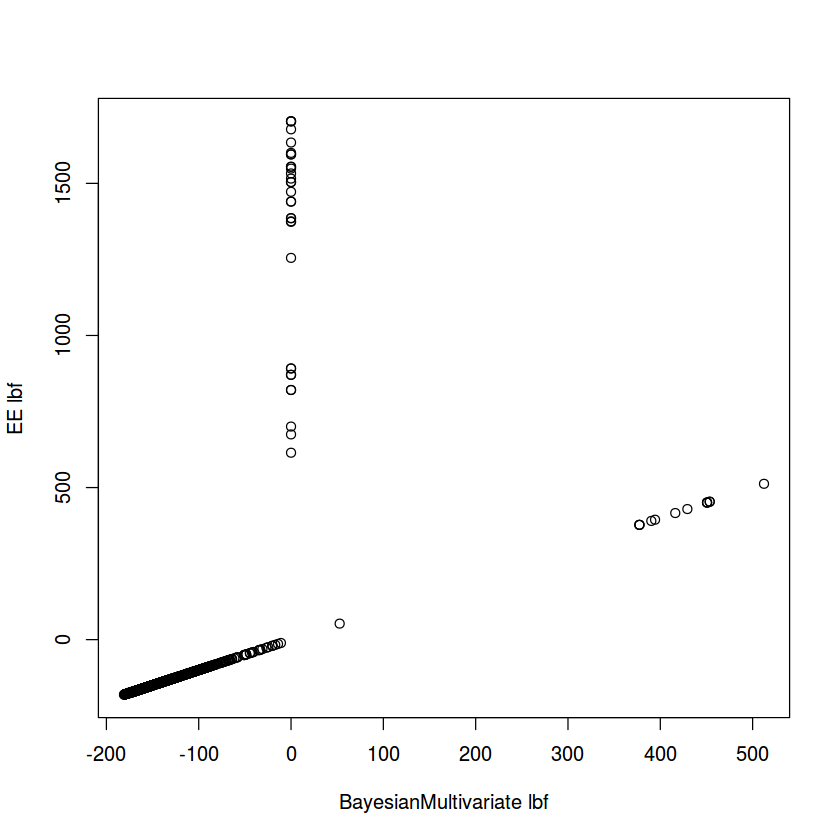

In [21]:
plot(dat$good_lbf, lbf, xlab="BayesianMultivariate lbf", ylab = "EE lbf")

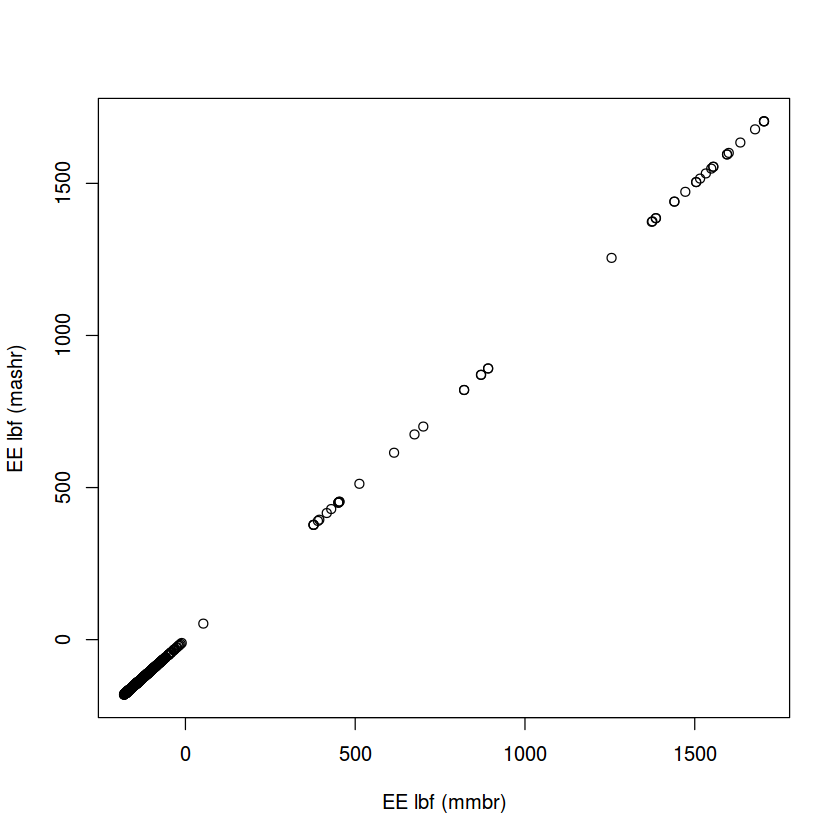

In [22]:
plot(dat$bad_lbf, lbf, xlab="EE lbf (mmbr)", ylab = "EE lbf (mashr)")

lbf indeed agrees with what `mmbr:::MashRegression` gives, not consistent with what `BayesianMultivariateRegression` says.